In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
# Load Dataset
data=pd.read_csv(r"/Users/niteshtalukdar/Documents/PythonData1200/raisin.csv")
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [18]:
#Identify number of Classes (i.e. Species)
data['Class'].unique()

array(['Kecimen', 'Besni'], dtype=object)

In [19]:
#Key Statistics
data.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


<Axes: >

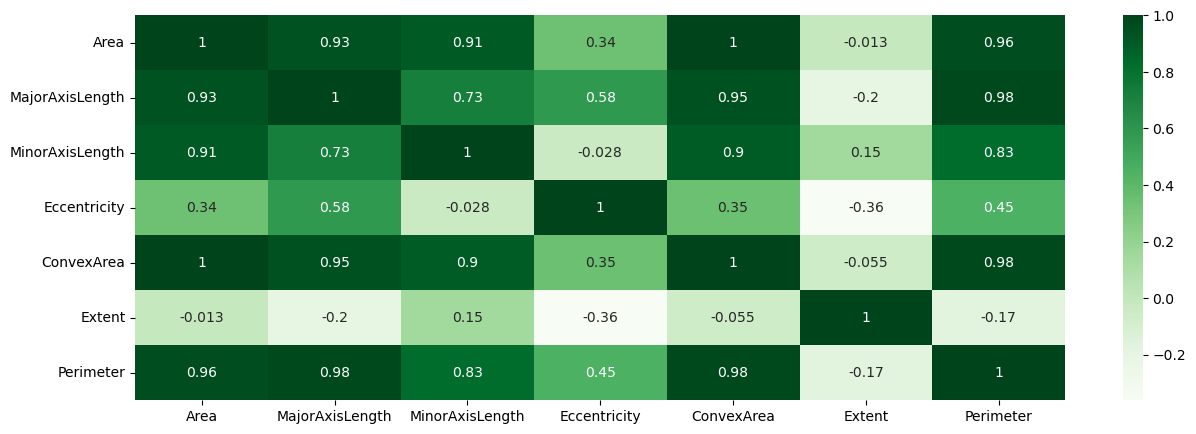

In [22]:
#Visualization of Correlations
fig = plt.figure(figsize=(15,5))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap="Greens")

In [24]:
#Create x and y variables
X = data.drop('Class',axis=1).to_numpy()
y = data['Class'].to_numpy()

#Create Train and Test datasets
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size = 0.20,random_state=100)

#Scale the data
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
x_train2 = sc.fit_transform(X_train)
x_test2 = sc.transform(X_test)

In [25]:
#Script for Decision Tree
from sklearn.tree import DecisionTreeClassifier  
from sklearn.metrics import classification_report, confusion_matrix 

for name,method in [('DT', DecisionTreeClassifier(random_state=100))]: 
    method.fit(x_train2,y_train)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))


Estimator: DT
[[73 17]
 [19 71]]
              precision    recall  f1-score   support

       Besni       0.79      0.81      0.80        90
     Kecimen       0.81      0.79      0.80        90

    accuracy                           0.80       180
   macro avg       0.80      0.80      0.80       180
weighted avg       0.80      0.80      0.80       180

